In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df = pd.read_csv("covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
import matplotlib.style as style

## For Styling..
style.use('ggplot')
plt.rcParams['font.family'] = "serif"

In [4]:
df.shape

(27166, 8)

In [5]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     14009
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,27166.000000,27166.000000,27166.000000,27166.000000
mean,13583.500000,5779.678274,379.205625,1783.397188
std,7842.293043,23595.566639,2226.879449,11100.630820
min,1.000000,0.000000,0.000000,0.000000
25%,6792.250000,18.000000,0.000000,0.000000
50%,13583.500000,199.000000,3.000000,8.000000
75%,20374.750000,1400.000000,30.000000,197.000000
max,27166.000000,354370.000000,35704.000000,294312.000000


In [7]:
df.columns = ['SNo','Date','State','Country','Last Update','Confirmed','Deaths','Recovered']

In [8]:
df.head(5)

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
df.Country = df['Country'].replace({'Mainland China':'China'})

In [10]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0


Text(0, 0.5, 'Count')

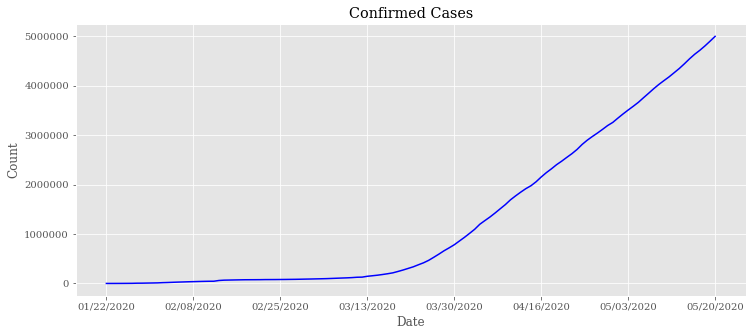

In [15]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Confirmed'].sum(),c='b')
plt.xticks(range(0,df.Date.nunique(),17),)
plt.title('Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

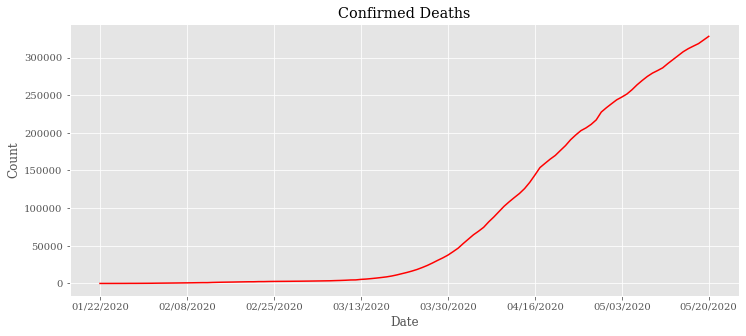

In [16]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Deaths'].sum(),color = 'r')
plt.xticks(np.arange(0,df.Date.nunique(),17))
plt.title('Confirmed Deaths')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

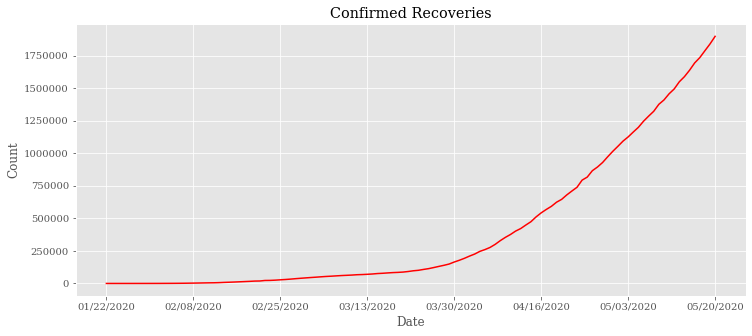

In [17]:
plt.figure(figsize = (12,5))
plt.plot(df.groupby('Date')['Recovered'].sum(),color = 'r')
plt.xticks(np.arange(0,df.Date.nunique(),17))
plt.title('Confirmed Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')

In [18]:
df.Confirmed = df.Confirmed.astype(int)
df.Deaths = df.Deaths.astype(int)
df.Recovered = df.Recovered.astype(int)

In [19]:
latest_data = df[df['Date'] == max(df['Date'])]

In [20]:
df_country = latest_data.groupby('Country')['Confirmed','Deaths','Recovered'].sum().sort_values('Confirmed',ascending = False)[:15].reset_index()

In [21]:
df_country

,Country,Confirmed,Deaths,Recovered
0,US,1551853,93439,294312
1,Russia,308705,2972,85392
2,Brazil,291579,18859,116683
3,UK,249619,35786,1116
4,Spain,232555,27888,150376
5,Italy,227364,32330,132282
6,France,181700,28135,63472
7,Germany,178473,8144,156966
8,Turkey,152587,4222,113987
9,Iran,126949,7183,98808


Text(0.5, 1.0, 'Total Cases of Top 15 Countries')

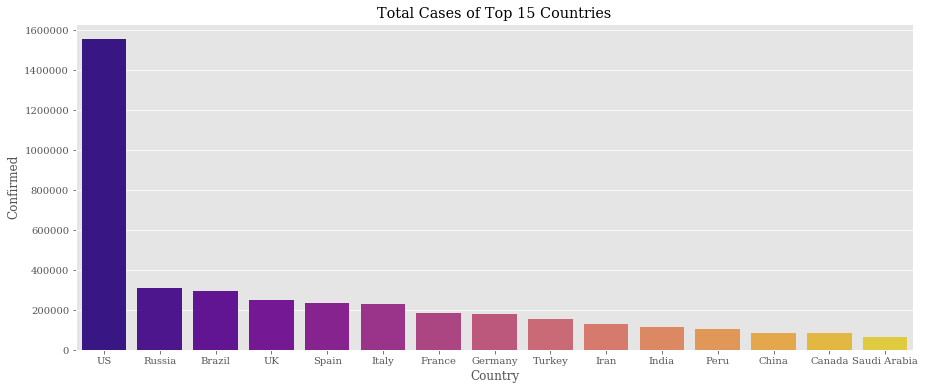

In [22]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Confirmed', data = df_country, palette = 'plasma')
plt.title('Total Cases of Top 15 Countries')

Text(0.5, 1.0, 'Total Deaths of Top 15 Countries')

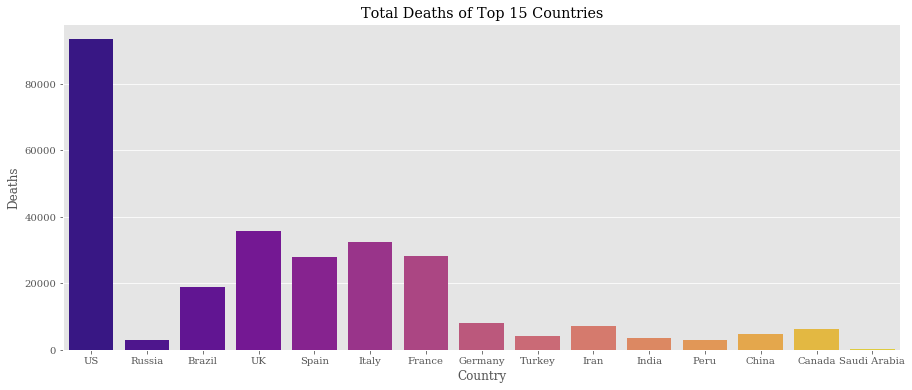

In [23]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Deaths', data = df_country, palette = 'plasma')
plt.title('Total Deaths of Top 15 Countries')

Text(0.5, 1.0, 'Total Recoveries of Top 15 Countries')

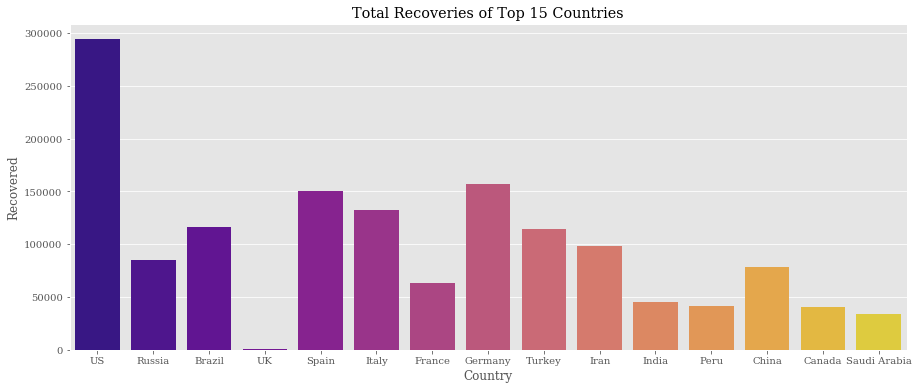

In [24]:
plt.figure(figsize = [15,6])
sns.barplot('Country','Recovered', data = df_country, palette = 'plasma')
plt.title('Total Recoveries of Top 15 Countries')

In [25]:
df_country['Deaths/Total'] = df_country['Deaths']/df_country['Confirmed']
df_country['Recovered/Total'] = df_country['Recovered']/df_country['Confirmed']

In [26]:
df_country.head()

,Country,Confirmed,Deaths,Recovered,Deaths/Total,Recovered/Total
0,US,1551853,93439,294312,0.060211,0.189652
1,Russia,308705,2972,85392,0.009627,0.276614
2,Brazil,291579,18859,116683,0.064679,0.400176
3,UK,249619,35786,1116,0.143362,0.004471
4,Spain,232555,27888,150376,0.119920,0.646626


# Death Percentage in Top 15 countries

Text(0.5, 0, 'Death %')

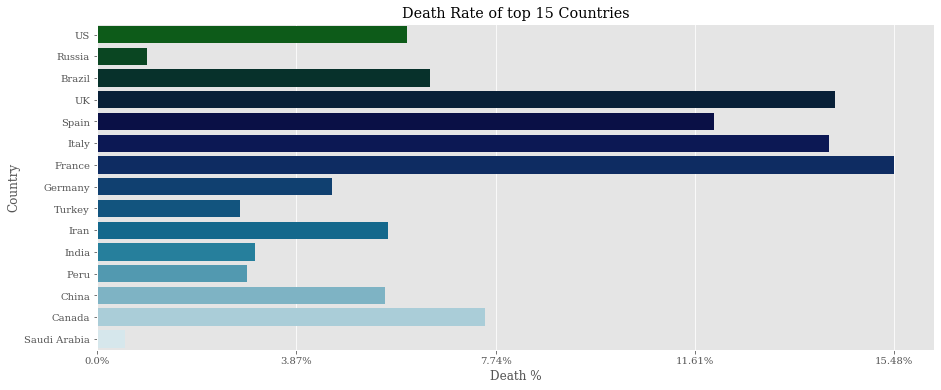

In [32]:
plt.figure(figsize = [15,6])
sns.barplot('Deaths/Total','Country',data = df_country,palette = 'ocean')
labels = list(np.linspace(0,max(df_country['Deaths/Total']),5)*100)
labels = [str(round(elem, 2))+'%' for elem in labels]
plt.xticks(np.linspace(0,max(df_country['Deaths/Total']),5),labels)
plt.title('Death Rate of top 15 Countries')
plt.xlabel('Death %')

# Recovery Percentage in Top 15 countries

Text(0.5, 0, 'Recovered %')

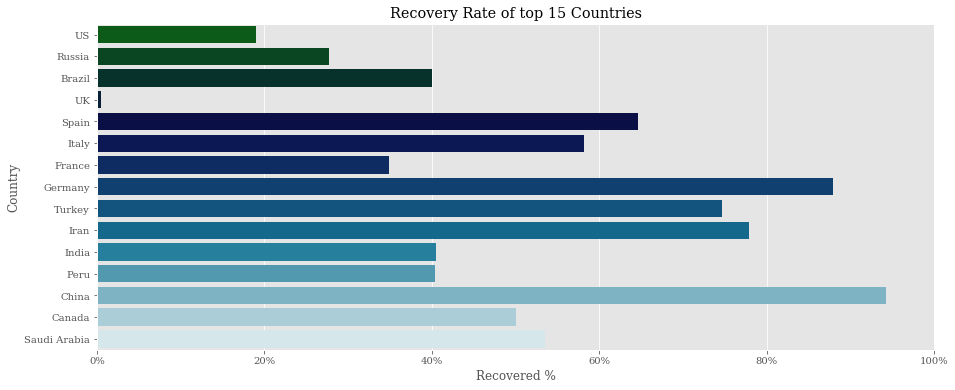

In [52]:
plt.figure(figsize = [15,6])
sns.barplot('Recovered/Total','Country',data = df_country,palette = 'ocean')
plt.xticks(np.linspace(0,1,6),['0%','20%','40%','60%','80%','100%'])
plt.title('Recovery Rate of top 15 Countries')
plt.xlabel('Recovered %')

# Normalizing Data

population = {
    'US' : 331002651,
    'Russia' : 145934462,
    'Brazil' : 212559417,
    'UK' : 67886011,
    'Spain' : 46754778,
    'Italy' : 60461826,
    'France' : 65273511,
    'Germany' : 83783942 ,
    'Turkey' : 84339067,
    'Iran' :  83992949,
    'India': 1380004385 
}

In [48]:
df_country_Top10 = df_country.iloc[:11,:]
df_country_Top10['Population'] = population.values()
df_country_Top10

,Country,Confirmed,Deaths,Recovered,Deaths/Total,Recovered/Total,Population
0,US,1551853,93439,294312,0.060211,0.189652,331002651
1,Russia,308705,2972,85392,0.009627,0.276614,145934462
2,Brazil,291579,18859,116683,0.064679,0.400176,212559417
3,UK,249619,35786,1116,0.143362,0.004471,67886011
4,Spain,232555,27888,150376,0.119920,0.646626,46754778
5,Italy,227364,32330,132282,0.142195,0.581807,60461826
6,France,181700,28135,63472,0.154843,0.349323,65273511
7,Germany,178473,8144,156966,0.045632,0.879494,83783942
8,Turkey,152587,4222,113987,0.027669,0.747030,84339067
9,Iran,126949,7183,98808,0.056582,0.778328,83992949


In [50]:
df_country_Top10['rate_C'] = df_country_Top10['Confirmed']/df_country_Top10['Population']
df_country_Top10['rate_D'] = df_country_Top10['Deaths']/df_country_Top10['Population']
df_country_Top10['rate_R'] = df_country_Top10['Recovered']/df_country_Top10['Population']

In [51]:
df_country_Top10

,Country,Confirmed,Deaths,Recovered,Deaths/Total,Recovered/Total,Population,rate_C,rate_D,rate_R
0,US,1551853,93439,294312,0.060211,0.189652,331002651,0.004688,0.000282,0.000889
1,Russia,308705,2972,85392,0.009627,0.276614,145934462,0.002115,0.000020,0.000585
2,Brazil,291579,18859,116683,0.064679,0.400176,212559417,0.001372,0.000089,0.000549
3,UK,249619,35786,1116,0.143362,0.004471,67886011,0.003677,0.000527,0.000016
4,Spain,232555,27888,150376,0.119920,0.646626,46754778,0.004974,0.000596,0.003216
5,Italy,227364,32330,132282,0.142195,0.581807,60461826,0.003760,0.000535,0.002188
6,France,181700,28135,63472,0.154843,0.349323,65273511,0.002784,0.000431,0.000972
7,Germany,178473,8144,156966,0.045632,0.879494,83783942,0.002130,0.000097,0.001873
8,Turkey,152587,4222,113987,0.027669,0.747030,84339067,0.001809,0.000050,0.001352
9,Iran,126949,7183,98808,0.056582,0.778328,83992949,0.001511,0.000086,0.001176


Text(0.5, 0, 'Rate')

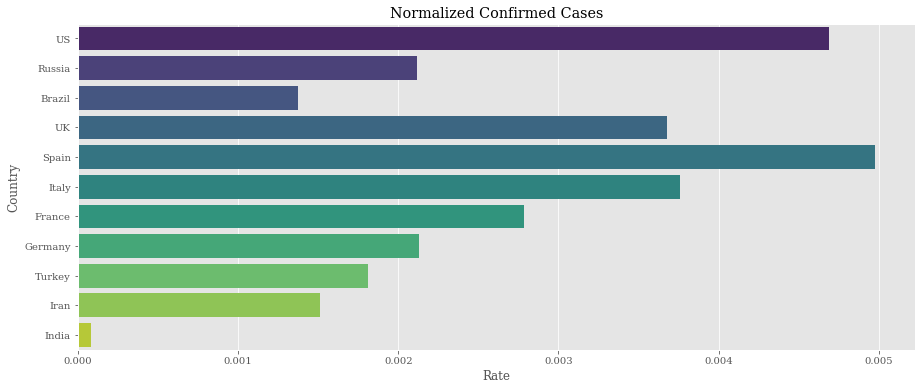

In [58]:
plt.figure(figsize = [15,6])
sns.barplot('rate_C','Country',data = df_country_Top10,palette = 'viridis')
plt.title('Normalized Confirmed Cases')
plt.xlabel('Rate')

Text(0.5, 0, 'Rate')

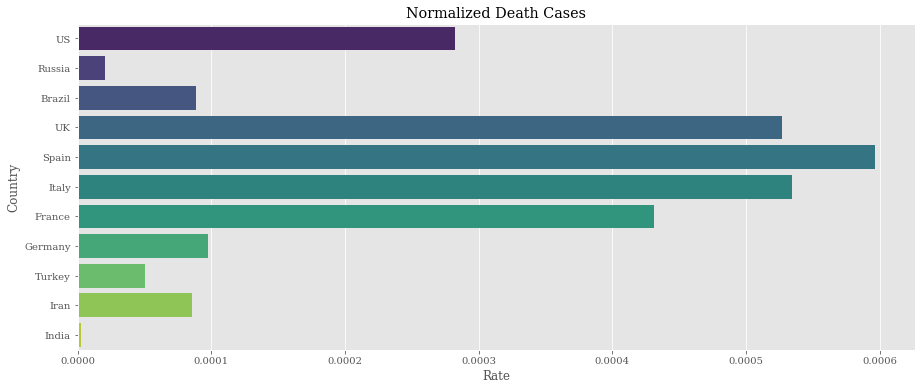

In [59]:
plt.figure(figsize = [15,6])
sns.barplot('rate_D','Country',data = df_country_Top10,palette = 'viridis')
plt.title('Normalized Death Cases')
plt.xlabel('Rate')

Text(0.5, 0, 'Rate')

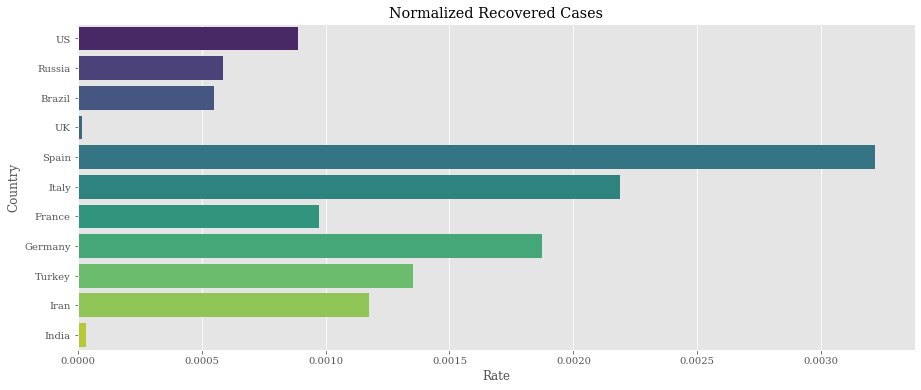

In [60]:
plt.figure(figsize = [15,6])
sns.barplot('rate_R','Country',data = df_country_Top10,palette = 'viridis')
plt.title('Normalized Recovered Cases')
plt.xlabel('Rate')